In [2]:
import math
import scipy.integrate
import scipy.misc
import scipy.stats
import matplotlib.pyplot as plt

Zadanie 1.

In [27]:
#1.1
print("Rozwiązanie analityczne:(1/2)*(1-e^-2)~0.43233..")
def f(x):
  return math.pow(math.e,-2*x);
#1.2
a = 0
b = 1
N = 10#liczba przedziałow
sum = 0
dx = (b - a) / N
sum=f((a+b)/2)*(b-a)
print('Metoda prostokątów ',sum)
sum=0
#1.3

sum=((b-a)/2)*(f(a)+f(b))
print('Metoda prostych trapezów ',sum)
sum=0
#1.4

sum=((b-a)/6)*(f(a)+4*f((a+b)/2)+f(b))
print('Metoda prosta Simpsona ',sum)
sum=0
#1.5
def trap(b):
    sum=0
    def func(b,i):
        return (a+(i)*((b-a)/N))
    for i in range(0,N):
        sum+=((func(b,i+1)-func(b,i))/2)*(f(func(b,i))+f(func(b,i+1)))
    return sum
print('Metoda złożonych trapezów ',trap(b))
sum=0
#1.6


def simps(b):
    sum=0
    def func(b,i):
        return (a+(i)*((b-a)/N))
    for i in range(0,N):
        sum+=((func(b,i+1)-func(b,i))/6)*(f(func(b,i))+4*f((func(b,i)+func(b,i+1))/2)+f(func(b,i+1)))
    return sum

print('Metoda złożona Simpsona ',simps(b))
sum=0

#1.7

romb=scipy.integrate.romberg(f,a,b,tol=10**-6)
print('Metoda Romberga ',romb)
#1.8

sum=scipy.integrate.quad(f,a,b)
print('Metoda quad ',sum)
print("Najbardziej zbliżony wynik do metody analitycznej daje metoda Romberga,złożona metoda Simpsona oraz metoda Quad.")

Rozwiązanie analityczne:(1/2)*(1-e^-2)~0.43233..
Metoda prostokątów  0.36787944117144233
Metoda prostych trapezów  0.5676676416183064
Metoda prosta Simpsona  0.4344755079870637
Metoda złożonych trapezów  0.43377250641846693
Metoda złożona Simpsona  0.43233259828070303
Metoda Romberga  0.43233235838943557
Metoda quad  (0.4323323583816936, 4.79985338565851e-15)
Najbardziej zbliżony wynik do metody analitycznej daje metoda Romberga,złożona metoda Simpsona oraz metoda Quad.


Zadanie 2.

In [3]:
accur = math.pow(10,-5)
maxit=100
p=0.5
N=100
a=0
def f(t):
   return math.pow(math.e,(-t**2)/2)/math.sqrt(2*math.pi)
def trap(b):
    sum=0
    def func(b,i):
        return (a+(i)*((b-a)/N))
    for i in range(0,N):
        sum+=((func(b,i+1)-func(b,i))/2)*(f(func(b,i))+f(func(b,i+1)))
    return sum

def simps(b):
    sum=0
    def func(b,i):
        return (a+(i)*((b-a)/N))
    for i in range(0,N):
        sum+=((func(b,i+1)-func(b,i))/6)*(f(func(b,i))+4*f((func(b,i)+func(b,i+1))/2)+f(func(b,i+1)))
    return sum

def NR(fx,dfx,a,accur,maxit):
    xa=a
    xb=xa-(fx(xa)/dfx(xa))
    i=0
    while maxit>i and abs(xa-xb)>accur:
        i+=1
        xa=xb
        xb=xa-fx(xa)/dfx(xa)
    return xb
def t(x):
    return trap(x)-0.45
def s(x):
    return simps(x)-0.45

ref = scipy.stats.norm.ppf(0.45+scipy.stats.norm.cdf(0))
trapezy = NR(t,f,p,accur,maxit)
simpson = NR(s,f,p,accur,maxit)
print('Metoda trapezów: ',trapezy,' błąd: ',abs(trapezy-ref))
print('Metoda Simpsona: ',simpson,' błąd: ',abs(simpson-ref))
print('Wartość referencyjna ', ref)
print("Możemy zauważyc, że bład przy użyciu metody Simpsona jest znacznie mniejszy co oznacza, że jest ona dokładniejsza.")

Metoda trapezów:  1.6448907135693664  błąd:  3.708661789425527e-05
Metoda Simpsona:  1.6448536269391643  błąd:  1.2307932450994485e-11
Wartość referencyjna  1.6448536269514722
Możemy zauważyc, że bład przy użyciu metody Simpsona jest znacznie mniejszy co oznacza, że jest ona dokładniejsza.


Zadanie 3.

In [4]:
import scipy
import scipy.interpolate
time=[0.0,0.5,1.0,2.0,3.0,4.0]
przysp=[-4.5,-4.5,-2.3,-1.0,-0.5,0.0]

finter = scipy.interpolate.InterpolatedUnivariateSpline(time, przysp,k=3)
x=[]
for t in time:
    x.append(scipy.integrate.quad(finter, 4, t)[0])
v = scipy.interpolate.InterpolatedUnivariateSpline(time,x,k=3)
s = abs(scipy.integrate.quad(v,0,4)[0])
print('Droga hamowania ',s,' m')
s1 = abs(scipy.integrate.quad(v,0,0.5)[0])
t = 0.5 - 0
print('Predkosc srednia ',s1/t, ' m/s')

Droga hamowania  6.331502525070518  m
Predkosc srednia  5.2192392674477786  m/s


Zadanie 4.

Trapez  11.063484774497711
Simpson  11.06348477449771
romberg  15.825159885482952


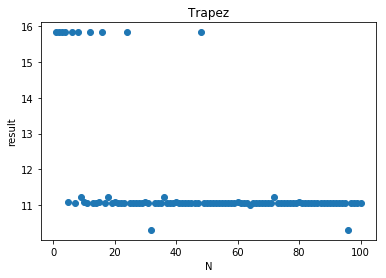

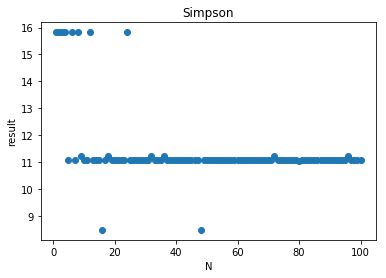

Na podstawie wykresów możemy wywnioskować, że wraz ze wzrostem N dokładność funkcji rośnie.


In [5]:
a=0
b=4.8
sum=0
N=1000
def df(x):
    return math.pi*math.cos(math.pi*x*10)
def function(x):
    return math.sqrt(1+df(x)**2)
def func(i,N):
    return (a+(i)*((b-a)/N))
def trapez(function,N):
    sum=0
    for i in range(0,N):
        sum+=((func(i+1,N)-func(i,N))/2)*(function(func(i,N))+function(func(i+1,N)))
    return sum
def simpson(function,N):
    sum=0
    for i in range(0,N):
        sum+=((func(i+1,N)-func(i,N))/6)*(function(func(i,N))+4*function((func(i,N)+func(i+1,N))/2)+function(func(i+1,N)))
    return sum
print("Trapez ",trapez(function,N))
print("Simpson ",simpson(function,N))
romb=scipy.integrate.romberg(function,a,b)
print("romberg ",romb)
przedzial = scipy.linspace(1,100,100)
trapl=[]
for i in range(1,101):
    trapl.append(trapez(function,i))
simpl=[]
for i in range(1,101):
    simpl.append(simpson(function,i))
plt.title('Trapez')
plt.plot(przedzial,trapl,"o")
plt.xlabel('N')
plt.ylabel('result')
plt.show()

plt.title('Simpson')
plt.plot(przedzial,simpl,"o")
plt.xlabel('N')
plt.ylabel('result')
plt.show()

print("Na podstawie wykresów możemy wywnioskować, że wraz ze wzrostem N dokładność funkcji rośnie.")